The X-Wines dataset offers a substantial amount of user feedback, including 21 million user evaluations across 100,646 instances. The variety of feedback makes it suitable for collaborative filtering and top-N recommendation tasks, which align well with DaisyRec’s strengths.

exploring datasets:

In [3]:
import pandas as pd

# Load the wines dataset
wines_df = pd.read_csv("All-XWines_Full_100K_wines_21M_ratings\XWines_Full_100K_wines.csv")
print("Wines DataFrame:")
print(wines_df.info())
print(wines_df.head())

# Load the ratings dataset
ratings_df = pd.read_csv("All-XWines_Full_100K_wines_21M_ratings\XWines_Full_21M_ratings.csv")
print("\nRatings DataFrame:")
print(ratings_df.info())
print(ratings_df.head())


Wines DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100646 entries, 0 to 100645
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   WineID      100646 non-null  int64  
 1   WineName    100646 non-null  object 
 2   Type        100646 non-null  object 
 3   Elaborate   100646 non-null  object 
 4   Grapes      100646 non-null  object 
 5   Harmonize   100646 non-null  object 
 6   ABV         100646 non-null  float64
 7   Body        100646 non-null  object 
 8   Acidity     100646 non-null  object 
 9   Code        100646 non-null  object 
 10  Country     100646 non-null  object 
 11  RegionID    100646 non-null  int64  
 12  RegionName  100646 non-null  object 
 13  WineryID    100646 non-null  int64  
 14  WineryName  100646 non-null  object 
 15  Website     82779 non-null   object 
 16  Vintages    100646 non-null  object 
dtypes: float64(1), int64(3), object(13)
memory usage: 13.1+ MB
None
   Wi

C:\Users\Pavel Detvan\AppData\Local\Temp\ipykernel_14044\1303388274.py:10: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  ratings_df = pd.read_csv("All-XWines_Full_100K_wines_21M_ratings\XWines_Full_21M_ratings.csv")



Ratings DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21013536 entries, 0 to 21013535
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   RatingID  int64  
 1   UserID    int64  
 2   WineID    int64  
 3   Vintage   object 
 4   Rating    float64
 5   Date      object 
dtypes: float64(1), int64(3), object(2)
memory usage: 961.9+ MB
None
   RatingID   UserID  WineID Vintage  Rating                 Date
0         1  1604441  136103    1950     4.0  2019-10-14 11:20:52
1         2  1291483  136103    1950     5.0  2019-11-28 03:36:33
2         3  1070605  104036    1950     5.0  2017-12-28 10:15:55
3         4  1080181  144864    1950     5.0  2016-06-23 02:16:22
4         5  1834379  111430    1950     5.0  2021-05-16 17:58:14


In [4]:
# Check for missing values in both datasets
print("\nMissing values in wines data:")
print(wines_df.isnull().sum())

print("\nMissing values in ratings data:")
print(ratings_df.isnull().sum())

# Explore the rating distribution
print("\nRating distribution:")
print(ratings_df['Rating'].value_counts())

# Unique users and wines in the ratings dataset
unique_users = ratings_df['UserID'].nunique()
unique_wines = ratings_df['WineID'].nunique()
print(f"\nNumber of unique users: {unique_users}")
print(f"Number of unique wines: {unique_wines}")

# Explore the wine types and countries in the wines dataset
print("\nMost common wine types:")
print(wines_df['Type'].value_counts())

print("\nMost common countries:")
print(wines_df['Country'].value_counts())



Missing values in wines data:
WineID            0
WineName          0
Type              0
Elaborate         0
Grapes            0
Harmonize         0
ABV               0
Body              0
Acidity           0
Code              0
Country           0
RegionID          0
RegionName        0
WineryID          0
WineryName        0
Website       17867
Vintages          0
dtype: int64

Missing values in ratings data:
RatingID    0
UserID      0
WineID      0
Vintage     0
Rating      0
Date        0
dtype: int64

Rating distribution:
Rating
4.0    8301655
3.5    3389567
5.0    2950264
3.0    2755661
4.5    2505818
2.5     468045
2.0     425593
1.0     152452
1.5      64481
Name: count, dtype: int64

Number of unique users: 1056079
Number of unique wines: 100646

Most common wine types:
Type
Red             56162
White           29196
Sparkling        7366
Rosé             4401
Dessert          2409
Dessert/Port     1112
Name: count, dtype: int64

Most common countries:
Country
France      

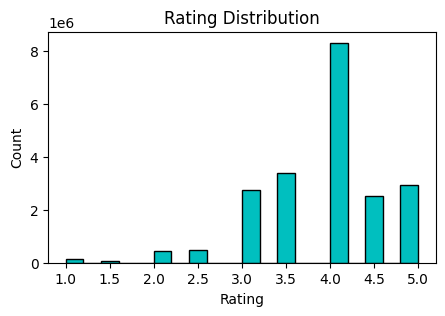

In [8]:
import matplotlib.pyplot as plt

# Plot the rating distribution
plt.figure(figsize=(5, 3))
ratings_df['Rating'].hist(bins=20, edgecolor='black', color='c')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(False)
plt.show()


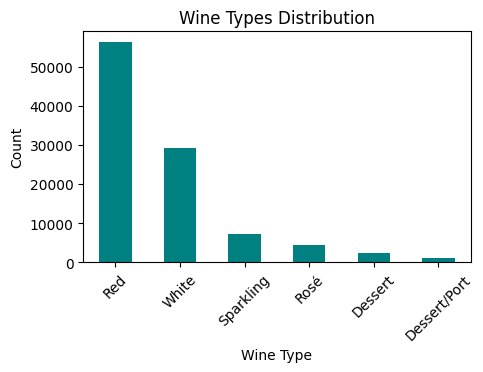

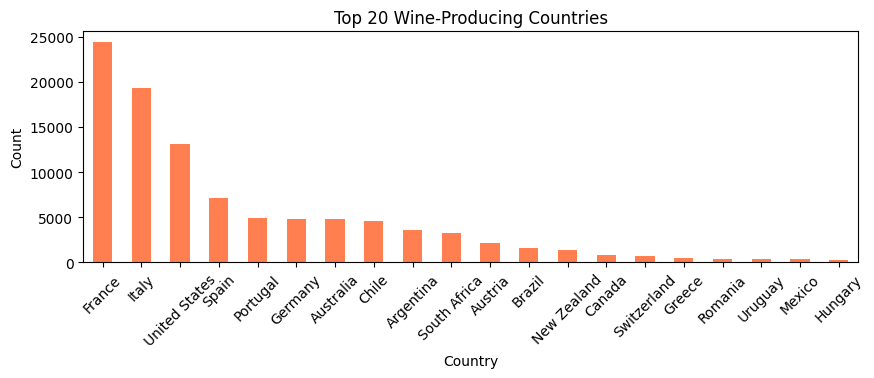

In [10]:
# Plot distribution of wine types
plt.figure(figsize=(5,3))
wines_df['Type'].value_counts().plot(kind='bar', color='teal')
plt.title('Wine Types Distribution')
plt.xlabel('Wine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot distribution of countries
plt.figure(figsize=(10,3))
wines_df['Country'].value_counts().head(20).plot(kind='bar', color='coral')  # Top 20 countries
plt.title('Top 20 Wine-Producing Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [16]:
# Filter wines from a specific country
country_filter = 'Slovakia'  # Change this to any country

wines_from_country = wines_df[wines_df['Country'] == country_filter]
print(f"Wines from {country_filter}:")
print(wines_from_country[['WineID', 'WineName', 'Type', 'RegionName', 'WineryName', 'Harmonize']].to_markdown())


Wines from Slovakia:
|        |   WineID | WineName                                    | Type      | RegionName     | WineryName          | Harmonize                                                                                   |
|-------:|---------:|:--------------------------------------------|:----------|:---------------|:--------------------|:--------------------------------------------------------------------------------------------|
|  95765 |   195894 | Cabernet Sauvignon Rosé                     | Rosé      | Slovakia       | Mrva & Stanko       | ['Beef', 'Lamb', 'Spicy Food', 'Poultry']                                                   |
|  96495 |   196624 | Golden Eagle Cabernet Sauvignon Rosé        | Rosé      | Južnoslovenská | Vinum Nobile        | ['Beef', 'Lamb', 'Spicy Food', 'Poultry']                                                   |
|  97010 |   197139 | Jagnet Muškát Moravský                      | White     | Malokarpatská  | Karpatská Perla     | ['Fish',

In [ ]:
# Merge wines and ratings dataframes
merged_df = pd.merge(ratings_df, wines_df, on='WineID')

In [20]:
# Calculate average rating of wines from a specific country
country_filter = 'Italy'  # Change this to any country

avg_rating_by_country = merged_df[merged_df['Country'] == country_filter]['Rating'].mean()
print(f"Average rating of wines from {country_filter}: {avg_rating_by_country:.2f}")


Average rating of wines from Italy: 3.91


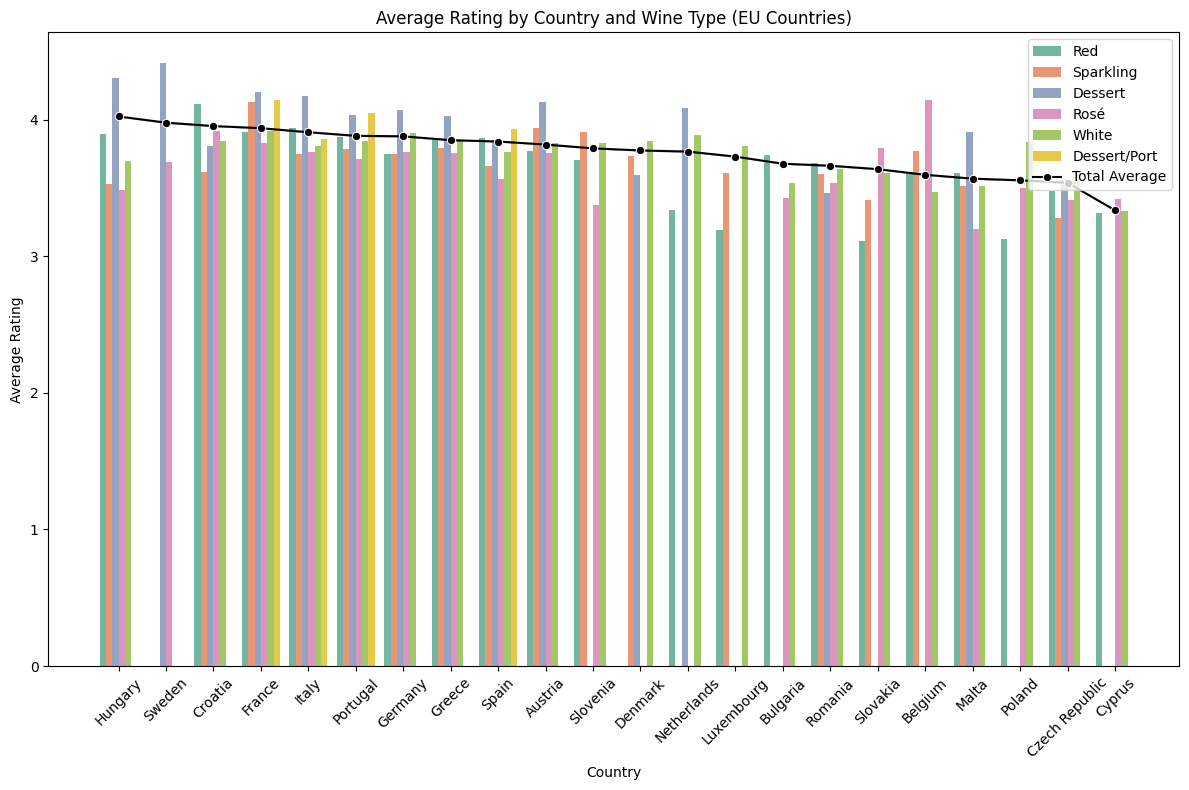

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average rating for each country and wine type
country_type_avg = merged_df.groupby(['Country', 'Type'])['Rating'].mean().reset_index()

# Calculate overall average rating for each country
country_avg = merged_df.groupby('Country')['Rating'].mean().reset_index().rename(columns={'Rating': 'Overall_Avg'})

# Merge the country_type_avg with overall country average
merged_avg = pd.merge(country_type_avg, country_avg, on='Country')

# Sort by overall average rating
merged_avg = merged_avg.sort_values(by='Overall_Avg', ascending=False)

# List of European Union countries
eu_countries = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 
    'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 
    'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 
    'Spain', 'Sweden'
]

# Filter the DataFrame to include only EU countries
eu_merged_avg = merged_avg[merged_avg['Country'].isin(eu_countries)]

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Country', y='Rating', hue='Type', data=eu_merged_avg, palette='Set2')
plt.xticks(rotation=45)
plt.title('Average Rating by Country and Wine Type (EU Countries)')
plt.ylabel('Average Rating')
plt.xlabel('Country')
plt.tight_layout()

# Add a line plot for total average rating
sns.lineplot(x='Country', y='Overall_Avg', data=eu_merged_avg, color='black', label='Total Average', marker="o")
plt.legend(loc='upper right')

plt.show()


C:\Users\Pavel Detvan\AppData\Local\Temp\ipykernel_14044\94387078.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='avg_rating', data=wine_type_stats, palette='Set1')


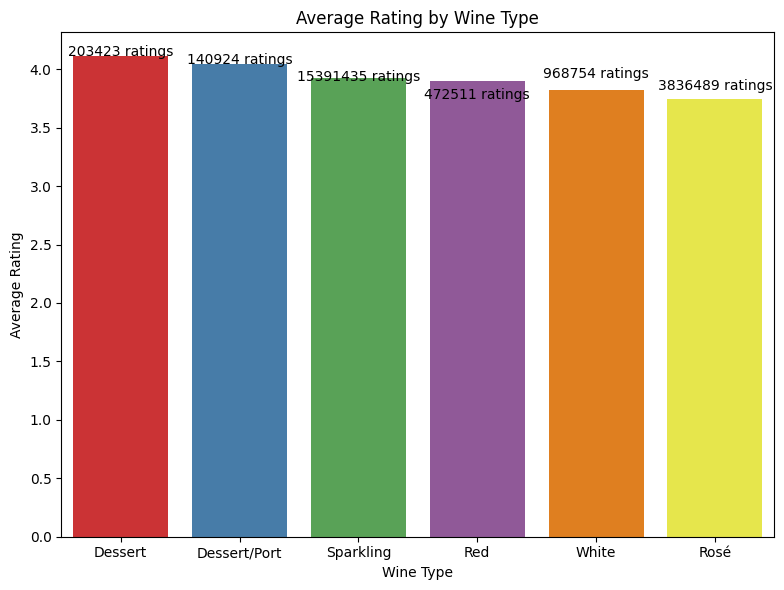

In [24]:
# Group by wine type to calculate average rating and count of ratings
wine_type_stats = merged_df.groupby('Type').agg(
    avg_rating=('Rating', 'mean'),
    total_ratings=('Rating', 'count')
).reset_index()

# Sort by average rating
wine_type_stats = wine_type_stats.sort_values(by='avg_rating', ascending=False)

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Type', y='avg_rating', data=wine_type_stats, palette='Set1')
plt.title('Average Rating by Wine Type')
plt.ylabel('Average Rating')
plt.xlabel('Wine Type')

# Adding number of ratings as a text on bars
for index, row in wine_type_stats.iterrows():
    plt.text(index, row.avg_rating, f'{row.total_ratings} ratings', color='black', ha="center")

plt.tight_layout()
plt.show()


data preprocessing:

I had to use slim because of memory. 

Solutions:
- use slim data
- Sampling the Full Dataset
    python
    Copy code
     Sample a subset of the full dataset, e.g., 10% of the data
    sampled_ratings = ratings_data.sample(frac=0.1, random_state=42)

     Merge with wines data after sampling
    sampled_merged_data = pd.merge(wine_data, sampled_ratings, on='WineID')

     Continue with the sampled data
- Use Sparse Matrices
    python
    Copy code
    from scipy.sparse import csr_matrix

     Convert the user-item matrix to a sparse format
    user_item_sparse = csr_matrix(user_item_matrix.values)

In [28]:
# Load the wines dataset
wines_df_slim = pd.read_csv("XWines_Slim_1K_wines_150K_ratings\XWines_Slim_1K_wines.csv")


# Load the ratings dataset
ratings_df_slim = pd.read_csv("XWines_Slim_1K_wines_150K_ratings\XWines_Slim_150K_ratings.csv")

C:\Users\Pavel Detvan\AppData\Local\Temp\ipykernel_14044\3642706869.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  ratings_df_slim = pd.read_csv("XWines_Slim_1K_wines_150K_ratings\XWines_Slim_150K_ratings.csv")


In [29]:
# Handle missing data (we'll drop 'Website' since it's not needed)
wine_data_clean = wines_df_slim.drop(columns=['Website'])

# Merge wines and ratings on WineID
merged_data = pd.merge(wine_data_clean, ratings_df_slim, on='WineID')

# Convert 'Date' and 'Vintage' to appropriate types
merged_data['Date'] = pd.to_datetime(merged_data['Date'], errors='coerce')
merged_data['Vintage'] = merged_data['Vintage'].astype(str)

# Display the first few rows of the merged data
print(merged_data.head())


   WineID            WineName       Type      Elaborate              Grapes  \
0  100001  Espumante Moscatel  Sparkling  Varietal/100%  ['Muscat/Moscato']   
1  100001  Espumante Moscatel  Sparkling  Varietal/100%  ['Muscat/Moscato']   
2  100001  Espumante Moscatel  Sparkling  Varietal/100%  ['Muscat/Moscato']   
3  100001  Espumante Moscatel  Sparkling  Varietal/100%  ['Muscat/Moscato']   
4  100001  Espumante Moscatel  Sparkling  Varietal/100%  ['Muscat/Moscato']   

                            Harmonize  ABV           Body Acidity Code  ...  \
0  ['Pork', 'Rich Fish', 'Shellfish']  7.5  Medium-bodied    High   BR  ...   
1  ['Pork', 'Rich Fish', 'Shellfish']  7.5  Medium-bodied    High   BR  ...   
2  ['Pork', 'Rich Fish', 'Shellfish']  7.5  Medium-bodied    High   BR  ...   
3  ['Pork', 'Rich Fish', 'Shellfish']  7.5  Medium-bodied    High   BR  ...   
4  ['Pork', 'Rich Fish', 'Shellfish']  7.5  Medium-bodied    High   BR  ...   

  RegionID    RegionName WineryID   WineryName  \


Since we're using DaisyRec, we'll set up a Collaborative Filtering recommender. We start with Matrix Factorization or Item-Based Collaborative Filtering (as these are common choices).

Set up a user-item matrix where users' ratings for wines are stored.
Decide on the recommendation strategy (we’ll use a basic item-based collaborative filtering approach).

Why Item-Based CF?:
This approach works well when we have detailed item information (such as wine types, grapes, and regions), and we can recommend similar items based on past user interactions.

In [30]:
# To create a recommender, we need a matrix where rows represent users and columns represent wines, with the ratings as values.

# Create a user-item matrix
user_item_matrix = merged_data.pivot_table(index='UserID', columns='WineID', values='Rating')

# Fill NaN values with 0 (for now; later we may handle missing data differently)
user_item_matrix.fillna(0, inplace=True)

# Display part of the user-item matrix
print(user_item_matrix.head())

WineID   100001  100002  100003  100005  100007  100008  100010  100012  \
UserID                                                                    
1000004     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1000010     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1000021     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1000023     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1000024     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

WineID   100013  100014  ...  198580  198885  199204  199306  199360  199408  \
UserID                   ...                                                   
1000004     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
1000010     0.0     4.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
1000021     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
1000023     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0

In [37]:
from daisyRec.model.Recommendation import SVD

# Create the model
model = SVD(k=50, max_iter=10, learning_rate=0.005, reg=0.02)

# Prepare the data (user-item interactions)
# Convert the user-item matrix to a format that DaisyRec expects
train_data = ratings_df[['UserID', 'WineID', 'Rating']]

# Train the model
model.fit(train_data)

# Make predictions for a specific user
user_id = 1  # Example user
predictions = model.predict(user_id)
print(predictions)  # Predicted ratings for wines


ModuleNotFoundError: No module named 'daisyRec'

In [38]:
import daisyRec
import os

print(os.listdir(daisyRec.__path__[0]))

ModuleNotFoundError: No module named 'daisyRec'

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
train_data, test_data = train_test_split(ratings_df, test_size=0.2, random_state=42)

# Train the model on the training data
model.fit(train_data)

# Evaluate on the test data
rmse = model.evaluate_rmse(test_data)
print(f"RMSE: {rmse}")


In [ ]:
# Generate top-N recommendations for a user
top_n_recommendations = model.recommend(user_id=1, n=5)
print(f"Top 5 recommendations for user {user_id}: {top_n_recommendations}")


Explanation of Choices:
Data Format: We used a user-item interaction matrix because it's the most common format for collaborative filtering models, allowing us to easily implement matrix factorization techniques like SVD.

SVD (Singular Value Decomposition): We chose SVD because it's a robust collaborative filtering method that factorizes the user-item matrix into latent factors, making predictions based on these factors.

DaisyRec: This framework supports scalable implementation of state-of-the-art recommendation algorithms, making it a great choice for handling matrix factorization and other collaborative filtering techniques.